In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",

  "features_path"   : "C:/Users/User/Desktop/Car Damage Detection/cdd/car_damage_check/FRS/features.h5",
  "labels_path"     : "C:/Users/User/Desktop/Car Damage Detection/cdd/car_damage_check/FRS/labels.h5",
  "classifier_path" : "C:/Users/User/Desktop/Car Damage Detection/cdd/car_damage_check/classifier.pickle",
  "model_path"      : "C:/Users/User/Desktop/Car Damage Detection/cdd/car_damage_check/FRS/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [3]:
features_path = config["features_path"]
labels_path = config["labels_path"]
test_size = config["test_size"]
seed = config["seed"]
classifier_path = config["classifier_path"]

In [4]:
h5f_data = h5py.File(features_path,'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))

print("[INFO] training started...")

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                 np.array(labels),
                                                                 test_size=test_size,
                                                                 random_state=seed)

print("[INFO] splitted train and test data...")
print("[INFO] train data: {}".format(trainData.shape))
print("[INFO] test data: {}".format(testData.shape))
print("[INFO] train labels: {}".format(trainLabels.shape))
print("[INFO] test labels: {}".format(testLabels.shape))

[INFO] features shape: (979, 4096)
[INFO] labels shape: (979,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data: (783, 4096)
[INFO] test data: (196, 4096)
[INFO] train labels: (783,)
[INFO] test labels: (196,)


In [6]:
print("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData,trainLabels)

[INFO] creating model...


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=9)

In [7]:
preds = model.predict(testData)

In [17]:
preds.shape

(196,)

In [8]:
print("[INFO] Saving model...")
pickle.dump(model,open(classifier_path,'wb'))

[INFO] Saving model...


In [10]:
print("[INFO] confusion matrix")

cm = confusion_matrix(testLabels, preds)

[INFO] confusion matrix


In [11]:
cm

array([[58, 12,  9],
       [ 9, 36, 12],
       [ 9,  9, 42]], dtype=int64)

In [18]:
accuracy = accuracy_score(testLabels, preds)

In [20]:
accuracy*100

69.38775510204081

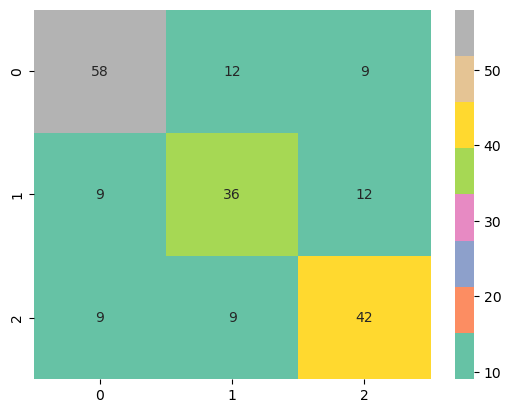

In [12]:
sns.heatmap(cm,
           annot=True,
           cmap="Set2")
plt.show()